In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sampled-data-js/df_miss_outliers_replaced_scaled.csv
/kaggle/input/sampled-data-js/df_miss_outliers_replaced_scaled_normalized.csv
/kaggle/input/sampled-data-js/df_test_scaled_normalized.csv
/kaggle/input/sampled-data-js/df_test_scaled.csv
/kaggle/input/sampled-data-js/sampled_data.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/responders.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/sample_submission.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/features.csv
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=4/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=5/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=6/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet/partition_id=3/part-0.parquet
/kaggle/input/jane-street-real-time-market-data-forec

In [3]:
# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook
pd.set_option('display.max_rows', 100) # increase number of displayed rows

# Data Preprocessing and Exploration Part I

In this part, we will preprocess our data and implement unsupervised learning with visualization while identifying interesting structure.

## Preprocessing includes (Part I):
1. General Feature Analysis
2. handling missing value
3. checking and encoding categorical data
4. handling outliers
5. normalizing and scaling
6. data splitting (Since test set is already provided, we will only separate out data into train set and validation set)

## Unsupervised Learning includes (Part I  & II):
1. Visualizatioin - data distribution (historgrams, density plot) (Part I  & II)
2. Visualizatioin - for individual features and their relationship with target value (Part II)
3. Visualizatioin - Correlation Matrix between Features (Part II)
4. Pattern Exploration - clustering & dimensionality (PCA) (Part II)

## Interesting Structure (Part I  & II):
With some domain knowledge, we have the following interesting findings:

not helpful to use symbol_id and time_id?
lags?

## Referred Notebook in this part:

https://www.kaggle.com/code/vroger11/quick-dataset-analysis-and-suggestions

https://www.kaggle.com/code/kevinlam/2024-jane-street-preprocessing-public

https://www.kaggle.com/code/mpwolke/plotting-on-jane-street

https://www.kaggle.com/code/shiyili/js2024-rmf-understanding-the-data

https://www.kaggle.com/competitions/jane-street-real-time-market-data-forecasting/discussion/548636

https://www.kaggle.com/code/michau96/jane-street-features-by-financial-instruments

# Loading Data
Load the sampled and reduced data to df

In [4]:
df = pd.read_csv("/kaggle/input/sampled-data-js/sampled_data.csv")

Load the test_data. We will scale and normalize it for consistency.

In [5]:
test_df = pd.read_parquet("/kaggle/input/jane-street-real-time-market-data-forecasting/test.parquet/date_id=0/part-0.parquet")

# General Feature Analysis

In [6]:
df

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0,571,1,3.8890,NaN,NaN,NaN,NaN,NaN,-0.17150,-0.61870,-0.59960,-1.04900,11,7,76,-1.027000,-0.3152,-0.96600,0.2450,0.9280,0.5615,0.01727,-0.09705,0.91000,NaN,1.63700,1.52200,-1.5520,-0.22960,NaN,NaN,1.37800,-0.2837,0.12317,NaN,0.26000,0.95900,0.1116,0.2181,0.1632,-0.1674,-0.3318,0.2612,0.59600,0.65500,1.7800,1.31400,1.5470,-0.000279,1.54500,0.15100,-0.003078,-0.01257,-1.7380,-0.07324,-0.2106,0.9520,-1.35600,-0.35900,-0.15730,0.11560,-0.06287,-0.444000,-0.18640,-1.362,-0.0972,0.1252,0.0734,0.4670,-0.24960,-0.91940,-0.42870,-0.59960,-0.72800,-0.302500,-0.911600,-0.36650,-0.3110,-0.40260,-0.26170,-0.21770,-0.32860,0.09845,0.38750,0.67040,-0.09985,0.35720,0.000500,-0.22500,-0.04556,-0.93460
1,0,279,7,1.3710,NaN,NaN,NaN,NaN,NaN,-0.30130,0.02647,-0.20070,-0.55400,11,7,76,-0.518000,-0.5303,-0.34570,1.1630,2.3300,1.3125,-0.56400,-0.32300,1.41300,NaN,0.52050,0.74400,-0.7886,0.64160,NaN,NaN,0.22720,0.5810,1.12900,NaN,0.66360,-2.00200,0.3547,0.1089,-1.1310,-0.3220,-0.3596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.98100,-0.002695,-0.02402,0.5670,-2.80700,-0.5474,-0.4520,-1.57400,-0.91600,0.28660,-0.16700,0.15750,0.008080,0.23720,-1.362,NaN,NaN,NaN,NaN,NaN,-0.52700,-0.39000,-0.32760,-0.32470,-0.379600,-0.289300,-0.29880,-0.3857,-0.27730,-0.25590,-0.27830,-0.26700,-0.91750,3.75600,-0.00010,-0.42190,0.70600,0.017350,0.05487,0.71600,0.03198
2,0,494,14,0.4407,NaN,NaN,NaN,NaN,NaN,-0.01886,0.37230,-0.46480,-0.72750,44,3,16,-0.296600,-0.3520,-0.15710,0.1887,-0.4792,-0.1444,-1.67500,0.65670,-0.18200,NaN,-0.96970,-0.67400,-1.2820,-1.39900,NaN,NaN,0.04382,-0.3203,-0.03170,NaN,0.04208,1.18200,0.2880,-0.3037,-1.4970,-1.2490,-1.5220,1.9370,2.44500,2.38500,2.6640,2.98200,3.2300,NaN,NaN,-0.11490,-0.010560,-0.21400,-0.6387,0.89100,-0.1827,0.5320,1.22600,-0.60000,0.87450,0.15010,-0.14340,-0.007652,-0.08856,-1.362,NaN,NaN,NaN,NaN,NaN,-0.55220,-0.33840,-0.08124,-0.11340,-0.317100,-0.287800,0.51860,1.1450,3.56000,3.49600,1.19400,0.69240,-0.31790,-0.57000,-0.01756,0.03888,-1.48600,-0.262200,0.35080,-0.87550,-0.25120
3,0,305,14,0.4407,NaN,NaN,NaN,NaN,NaN,0.05188,0.13770,0.98900,-1.02300,44,3,16,0.442600,0.2986,0.44000,0.2756,-0.3716,0.1156,-1.43750,0.30540,-0.18200,NaN,-0.96970,-0.67400,-1.2820,-1.39900,NaN,NaN,0.04382,-0.3203,-0.03170,NaN,-0.03035,-0.01357,0.4675,-0.1633,-0.1231,-1.1570,-1.3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.42020,-0.003128,0.29080,0.5054,-0.05682,-1.3790,1.0820,0.70650,0.03525,0.32370,1.48100,0.35130,-0.153000,0.14770,-1.362,NaN,NaN,NaN,NaN,NaN,0.11145,0.61400,0.32930,0.95360,-0.272500,0.629000,0.24260,0.3132,-0.57100,-0.43870,-0.64400,-0.31150,-0.07570,0.81600,-0.09930,-1.74300,-0.73930,-0.000633,0.07214,-1.47600,0.13400
4,0,48,7,1.3710,NaN,NaN,NaN,NaN,NaN,1.26300,0.98500,1.30500,-1.11300,11,7,76,-0.352000,-0.4420,-0.00117,0.2198,1.0970,0.2976,-0.03235,0.18030,1.41300,NaN,0.52050,0.74400,-0.7886,0.64160,NaN,NaN,0.22720,0.5810,1.12900,NaN,-1.70300,-3.19700,0.0753,-0.3699,-0.0404,-0.1434,-0.1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.59000,-0.002380,0.15830,Na

In [7]:
df.describe()

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
count,471486.000000,471486.000000,471486.000000,471486.000000,439690.000000,439690.000000,439690.000000,439690.000000,439690.000000,471486.000000,471486.000000,471486.000000,468488.000000,471486.000000,471486.000000,471486.000000,471486.000000,471486.000000,471486.000000,459346.000000,471481.000000,469427.000000,471483.000000,471483.000000,471486.000000,387064.000000,471486.000000,471486.000000,471486.000000,471486.000000,387064.000000,387064.000000,471486.000000,471486.000000,471486.000000,387064.000000,466683.000000,466683.000000,471486.000000,471486.000000,471486.000000,471480.000000,471486.000000,428518.000000,470860.000000,460534.000000,428518.000000,470860.000000,460534.000000,468387.000000,468387.000000,471484.000000,471486.000000,471486.000000,428953.000000,471340.000000,460978.000000,428953.000000,471340.000000,460978.000000,471483.000000,471483.000000,466683.000000,471486.000000,471486.000000,471486.000000,468613.000000,469262.000000,469171.000000,468387.000000,468387.000000,471486.000000,471486.000000,471486.000000,471486.000000,471486.000000,471486.000000,466630.000000,466630.000000,470903.000000,470903.000000,471283.000000,471283.000000,471486.000000,471486.000000,471486.000000,471486.000000,471486.000000,471486.000000,471486.000000,471486.000000,471486.00000
mean,1005.605721,468.891645,18.110769,2.007507,0.574256,0.009463,0.573919,0.572338,-0.000287,-0.037875,-0.006298,-0.014019,0.082678,32.726577,4.876955,170.700256,-0.038079,-0.027446,-0.041391,-0.252059,-0.205068,-0.242828,-0.011112,-0.030734,-0.209286,0.037361,0.066450,0.071560,0.573634,0.092565,-0.048712,-0.236029,-0.156928,-0.214987,-0.258297,0.035917,0.420700,-0.017332,0.448057,0.446617,0.004292,0.036429,0.045550,0.029475,0.014541,0.042399,-0.062618,-0.053003,-0.081099,0.022218,-0.042352,-0.011652,-0.002654,-0.004511,-0.077293,-0.097793,-0.104135,0.071981,0.046442,0.084898,-0.027966,0.027911,-0.015659,-0.004005,-0.007189,0.012440,-0.179586,-0.144654,-0.166402,-0.043305,-0.050822,-0.041869,-0.024813,-0.039659,-0.032715,-0.022334,-0.036710,-0.017276,-0.023560,-0.001664,-0.007166,-0.005846,-0.011923,-0.001608,-0.002260,0.001675,-0.016015,-0.014005,-0.015794,-0.001872,0.000835,-0.00094
std,445.153702,272.528300,11.296980,1.127403,1.327621,1.085296,1.323281,1.323722,1.037871,1.021057,1.055483,1.054505,0.974841,23.856628,3.037501,164.520492,0.951160,0.874216,0.919988,0.911472,0.871217,0.913911,1.036234,1.060018,0.905396,0.780057,0.979481,0.939798,1.451338,1.019873,1.061936,1.056714,1.037784,0.876857,0.922542,0.656262,1.264391,0.987425,1.302480,1.297250,0.932861,0.936313,0.932845,0.929523,0.844787,0.876502,0.932904,0.848222,0.882003,0.958036,0.981606,0.959447,0.810682,0.865000,1.029052,0.923746,1.004677,1.034938,0.914222,0.999645,0.998239,1.034366,0.950652,0.929977,0.943298,1.112251,0.742894,0.726779,0.730216,1.046728,1.065061,0.924248,0.859497,0.904939,0.966909,0.852739,0.932377,0.959967,0.945529,0.951678,0.936114,0.961009,0.966741,0.591813,0.584009,0.602215,0.820722,0.8

## Categorical Values

All the features are numeric. Thus, we do not need to encode

In [8]:
# Separate features and responders

features_df = df.filter(regex='^feature_')
responders_df = df.filter(regex='^responder_')

In [9]:
features_df

,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_08,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
0,NaN,NaN,NaN,NaN,NaN,-0.17150,-0.61870,-0.59960,-1.04900,11,7,76,-1.027000,-0.3152,-0.96600,0.2450,0.9280,0.5615,0.01727,-0.09705,0.91000,NaN,1.63700,1.52200,-1.5520,-0.22960,NaN,NaN,1.37800,-0.2837,0.12317,NaN,0.26000,0.95900,0.1116,0.2181,0.1632,-0.1674,-0.3318,0.2612,0.59600,0.65500,1.7800,1.31400,1.5470,-0.000279,1.54500,0.15100,-0.003078,-0.01257,-1.7380,-0.07324,-0.2106,0.9520,-1.35600,-0.35900,-0.15730,0.11560,-0.06287,-0.444000,-0.18640,-1.362,-0.0972,0.1252,0.0734,0.4670,-0.24960,-0.91940,-0.42870,-0.59960,-0.72800,-0.302500,-0.911600,-0.36650,-0.3110,-0.40260,-0.26170,-0.21770,-0.32860
1,NaN,NaN,NaN,NaN,NaN,-0.30130,0.02647,-0.20070,-0.55400,11,7,76,-0.518000,-0.5303,-0.34570,1.1630,2.3300,1.3125,-0.56400,-0.32300,1.41300,NaN,0.52050,0.74400,-0.7886,0.64160,NaN,NaN,0.22720,0.5810,1.12900,NaN,0.66360,-2.00200,0.3547,0.1089,-1.1310,-0.3220,-0.3596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.98100,-0.002695,-0.02402,0.5670,-2.80700,-0.5474,-0.4520,-1.57400,-0.91600,0.28660,-0.16700,0.15750,0.008080,0.23720,-1.362,NaN,NaN,NaN,NaN,NaN,-0.52700,-0.39000,-0.32760,-0.32470,-0.379600,-0.289300,-0.29880,-0.3857,-0.27730,-0.25590,-0.27830,-0.26700
2,NaN,NaN,NaN,NaN,NaN,-0.01886,0.37230,-0.46480,-0.72750,44,3,16,-0.296600,-0.3520,-0.15710,0.1887,-0.4792,-0.1444,-1.67500,0.65670,-0.18200,NaN,-0.96970,-0.67400,-1.2820,-1.39900,NaN,NaN,0.04382,-0.3203,-0.03170,NaN,0.04208,1.18200,0.2880,-0.3037,-1.4970,-1.2490,-1.5220,1.9370,2.44500,2.38500,2.6640,2.98200,3.2300,NaN,NaN,-0.11490,-0.010560,-0.21400,-0.6387,0.89100,-0.1827,0.5320,1.22600,-0.60000,0.87450,0.15010,-0.14340,-0.007652,-0.08856,-1.362,NaN,NaN,NaN,NaN,NaN,-0.55220,-0.33840,-0.08124,-0.11340,-0.317100,-0.287800,0.51860,1.1450,3.56000,3.49600,1.19400,0.69240
3,NaN,NaN,NaN,NaN,NaN,0.05188,0.13770,0.98900,-1.02300,44,3,16,0.442600,0.2986,0.44000,0.2756,-0.3716,0.1156,-1.43750,0.30540,-0.18200,NaN,-0.96970,-0.67400,-1.2820,-1.39900,NaN,NaN,0.04382,-0.3203,-0.03170,NaN,-0.03035,-0.01357,0.4675,-0.1633,-0.1231,-1.1570,-1.3500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.42020,-0.003128,0.29080,0.5054,-0.05682,-1.3790,1.0820,0.70650,0.03525,0.32370,1.48100,0.35130,-0.153000,0.14770,-1.362,NaN,NaN,NaN,NaN,NaN,0.11145,0.61400,0.32930,0.95360,-0.272500,0.629000,0.24260,0.3132,-0.57100,-0.43870,-0.64400,-0.31150
4,NaN,NaN,NaN,NaN,NaN,1.26300,0.98500,1.30500,-1.11300,11,7,76,-0.352000,-0.4420,-0.00117,0.2198,1.0970,0.2976,-0.03235,0.18030,1.41300,NaN,0.52050,0.74400,-0.7886,0.64160,NaN,NaN,0.22720,0.5810,1.12900,NaN,-1.70300,-3.19700,0.0753,-0.3699,-0.0404,-0.1434,-0.1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.59000,-0.002380,0.15830,NaN,1.27900,0.6870,NaN,-1.30200,0.45140,-0.35180,1.24800,0.26500,-0.018000,0.22740,-1.362,NaN,NaN,NaN,NaN,NaN,-0.57400,-0.33860,-0.39060,0.03693,-0.371300,0.394500,-0.33570,-0.3083,-0.24480,-0.28540,-0.27690,-0.36620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [10]:
responders_df

,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,0.09845,0.38750,0.67040,-0.09985,0.35720,0.000500,-0.22500,-0.04556,-0.93460
1,-0.91750,3.75600,-0.00010,-0.42190,0.70600,0.017350,0.05487,0.71600,0.03198
2,-0.31790,-0.57000,-0.01756,0.03888,-1.48600,-0.262200,0.35080,-0.87550,-0.25120
3,-0.07570,0.81600,-0.09930,-1.74300,-0.73930,-0.000633,0.07214,-1.47600,0.13400
4,1.21400,0.37620,2.04700,-0.24880,0.72300,0.282200,-1.39400,-0.64600,-2.52000
...,...,...,...,...,...,...,...,...,...
471481,-0.08154,-0.06870,-0.27320,-0.13870,-0.08550,-0.166000,-0.08340,-0.05243,-0.09625
471482,-0.43970,-0.10950,-0.31130,-0.10846,-0.43820,0.084900,0.09436,-0.65430,0.48540
471483,-0.23820,0.84800,-0.31080,-0.63100,-0.66360,-0.038880,-0.81840,-0.45460,0.43260
471484,0.04440,0.32890,-0.18900,0.33250,-0.06647,-0.364000,0.23390,-0.21420,-0.24160


# Histograms Part I
We draw hisogram here to see the overall trend of the data and do simple feature analysis by intuition here

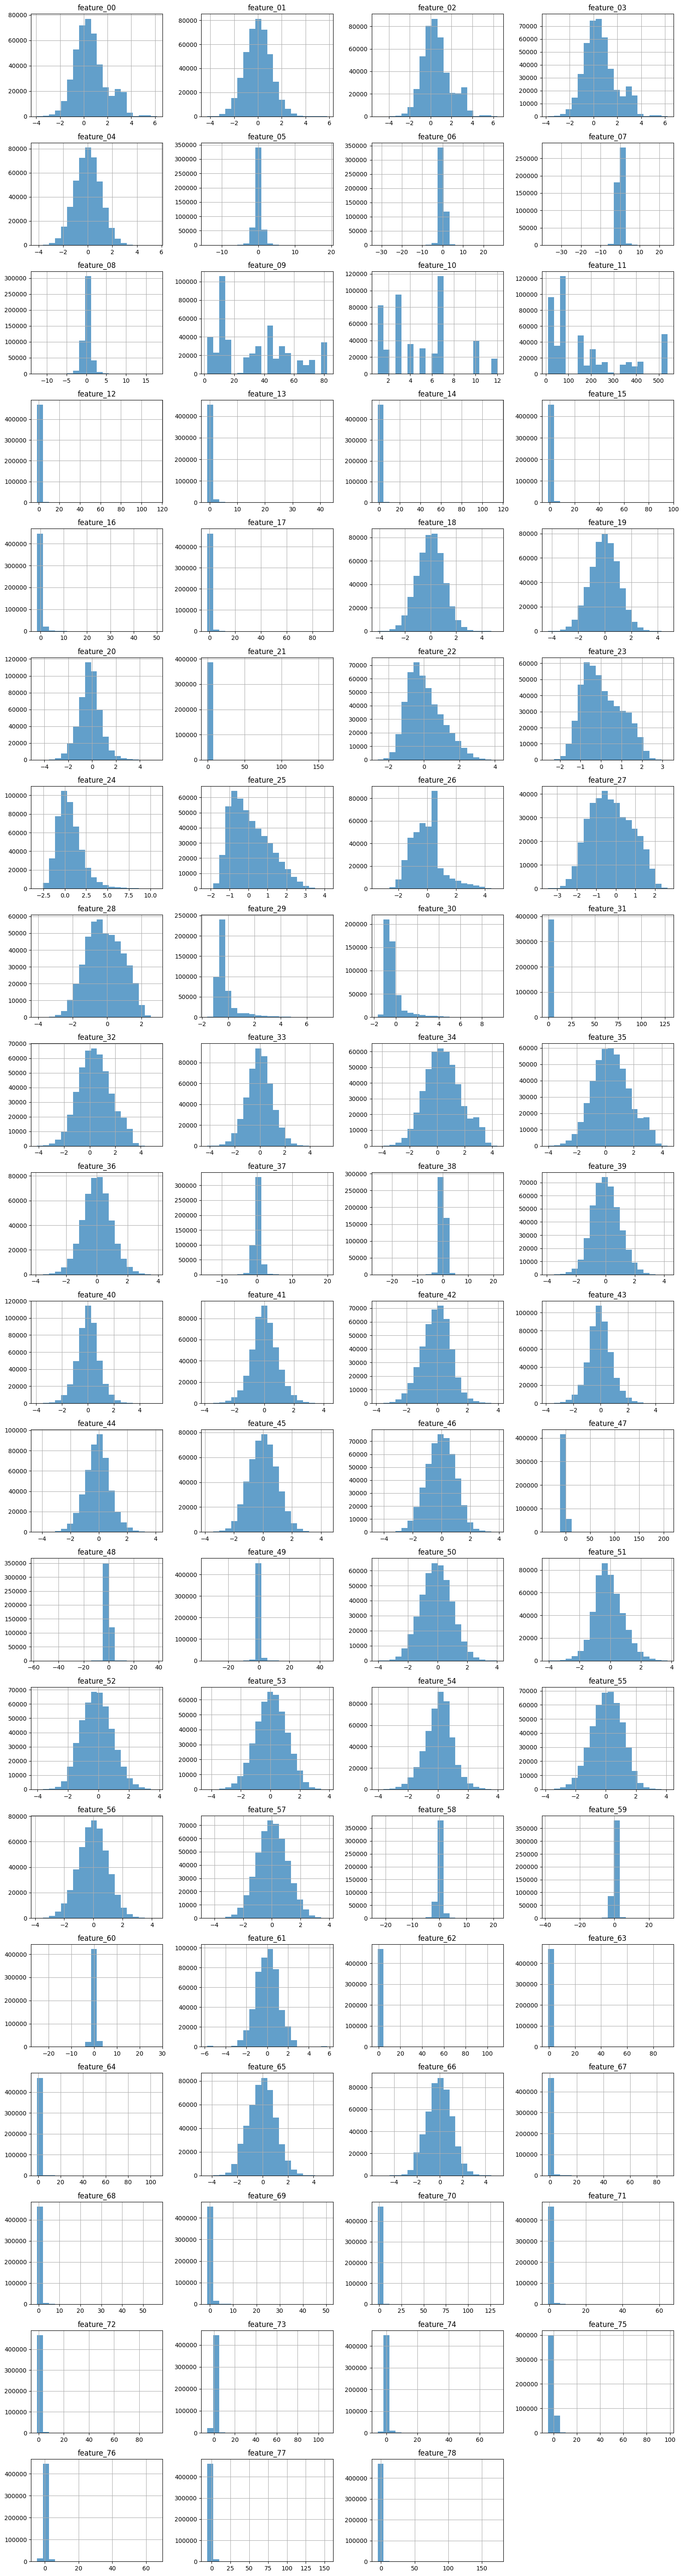

In [11]:
feature_labels = features_df.columns  # List of all column names

# Calculate the number of rows and columns for the subplot grid
n_cols = 4  # For example, 4 columns
n_rows = (len(feature_labels) + n_cols - 1) // n_cols  # This ensures there are enough rows

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # Adjust overall figure size

# Create a histogram for each feature
for i, feature_label in enumerate(feature_labels):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each feature
    df[feature_label].hist(bins=20, alpha=0.7)  # You can adjust the number of bins
    plt.title(feature_label)
    plt.tight_layout()

plt.show()

## Obervation from Histograms Part I
Some of the features has a very small std and all the data gathered at one value. This might be caused by the following reasons:
1. The size of out plot is not suitable. We will have more tailored visualization and analysis in Histograms Part II
2. The unit of the original data is small in scale. We will used scaling methods later to deal with this situation.
3. The feature is unbalanced. We will have more analysis when fitting the model and 
4. The feature is not relavant and we might considered reduce it.
These features are [05, 06, 07, 08, 12, 13, 14, 15, 16, 17, 21, 29, 30, 31, 37, 38, 47, 48, 49, 58, 59, 60, 62, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]

But for now, we can observe some feature distribute really well and some are skewed. We will also scale and normalize them later.

Some of the feature distributed rather randomly or gathered at multiple values. We will use clustering method later to see if they can be clustered. And when we are fitting the models, we might get rid of them and see whether they are relavant


# Handling Outliers

We used IQR method to identify outliers. With the commonly used parameter value 1.5, we identified too many ouliers and removing them heavily shrinkaged size of our data which might lead to underfitting. Thus, we improve the threshold and replace outliers with mean values.

In [12]:
#outliers

outliers_indices = {}  # Dictionary to store indices of outliers for each feature
outliers_values = {}  # Dictionary to store values of outliers for each feature

for column in features_df.columns:
    Q1 = features_df[column].quantile(0.25)
    Q3 = features_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    mask = (features_df[column] < lower_bound) | (features_df[column] > upper_bound)
    outliers_indices[column] = features_df.index[mask].tolist()
    outliers_values[column] = features_df.loc[mask, column].values.tolist()

## Boxplot

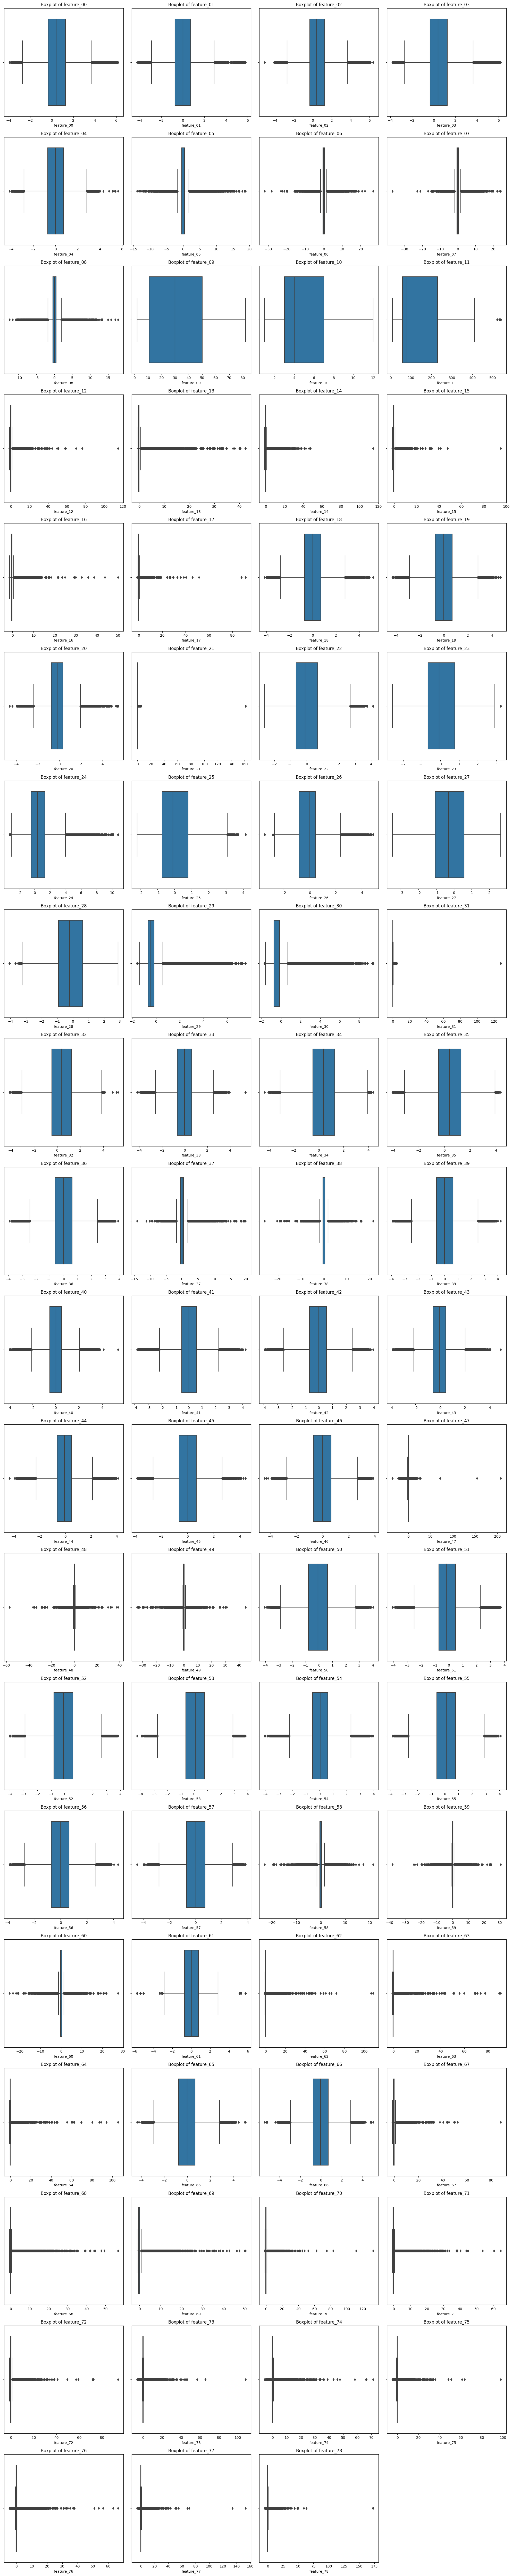

In [13]:
num_columns = len(features_df.columns)
num_plots_per_row = 4  # Number of plots in a single row
num_rows = (num_columns + num_plots_per_row - 1) // num_plots_per_row  # Calculate required number of rows

plt.figure(figsize=(num_plots_per_row * 5, num_rows * 5))  # Adjust the size as needed

# Loop through all the columns and create subplots
for i, column in enumerate(features_df.columns):
    plt.subplot(num_rows, num_plots_per_row, i + 1)  # Create a subplot for each feature
    sns.boxplot(x=features_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()  # Adjust subplots to fit into the figure neatly
plt.show()  # Display all plots

In [14]:
cleaned_df = features_df.copy()  # Create a copy to maintain the original data

for column in features_df.columns:
    Q1 = cleaned_df[column].quantile(0.25)
    Q3 = cleaned_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    mask = (cleaned_df[column] >= lower_bound) & (cleaned_df[column] <= upper_bound)
    cleaned_df = cleaned_df[mask].reset_index(drop=True)  # Reset index after filtering

## Commonly Used Threshold does not work

In [17]:
#outliers

outliers_indices = {}  # Dictionary to store indices of outliers for each feature
outliers_values = {}  # Dictionary to store values of outliers for each feature

for column in features_df.columns:
    Q1 = features_df[column].quantile(0.25)
    Q3 = features_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    mask = (features_df[column] < lower_bound) | (features_df[column] > upper_bound)
    outliers_indices[column] = features_df.index[mask].tolist()
    outliers_values[column] = features_df.loc[mask, column].values.tolist()

In [18]:
outlier_percentages = {}

total_rows = len(features_df)  # Get the total number of rows in the DataFrame

for column in features_df.columns:
    # Calculate the number of outliers
    num_outliers = len(outliers_indices[column])
    
    # Calculate the percentage of outliers
    percentage = (num_outliers / total_rows) * 100
    
    # Store the percentage in the dictionary
    outlier_percentages[column] = percentage

# Convert the dictionary to a DataFrame for better visualization
outlier_percentages_df = pd.DataFrame(list(outlier_percentages.items()), columns=['Feature', 'Outlier Percentage'])

# Print the DataFrame
print(outlier_percentages_df)

       Feature  Outlier Percentage
0   feature_00            1.136831
1   feature_01            0.702036
2   feature_02            1.101411
3   feature_03            1.117743
4   feature_04            0.547630
5   feature_05            7.437761
6   feature_06            8.649037
7   feature_07            8.076804
8   feature_08            5.697518
9   feature_09            0.000000
10  feature_10            0.000000
11  feature_11           10.542625
12  feature_12            6.336349
13  feature_13            9.247570
14  feature_14            7.267872
15  feature_15            8.429094
16  feature_16            8.731330
17  feature_17            8.655824
18  feature_18            0.682311
19  feature_19            0.687613
20  feature_20            2.501877
21  feature_21            5.184884
22  feature_22            0.779026
23  feature_23            0.002333
24  feature_24            2.658828
25  feature_25            0.221003
26  feature_26            2.826383
27  feature_27      

The portion of outlier is too high 

In [19]:
cleaned_df.shape

(37822, 79)

In [20]:
features_df.shape

(471486, 79)

The size of out dataset shrinkages heavily

## Improve Threshold and Replace Outliers with Mean Values

In [21]:

outliers_new_threshold_indices = {}  # Dictionary to store indices of outliers for each feature
outliers_new_threshold_values = {}  # Dictionary to store values of outliers for each feature

for column in features_df.columns:
    Q1 = features_df[column].quantile(0.25)
    Q3 = features_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    
    # Identify outliers
    mask = (features_df[column] < lower_bound) | (features_df[column] > upper_bound)
    outliers_new_threshold_indices[column] = features_df.index[mask].tolist()
    outliers_new_threshold_values[column] = features_df.loc[mask, column].values.tolist()

In [22]:
cleaned_new_threshold_df = features_df.copy()  # Create a copy to maintain the original data

for column in features_df.columns:
    Q1 = cleaned_new_threshold_df[column].quantile(0.25)
    Q3 = cleaned_new_threshold_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    
    # Filter out outliers
    mask = (cleaned_new_threshold_df[column] >= lower_bound) & (cleaned_new_threshold_df[column] <= upper_bound)
    cleaned_new_threshold_df = cleaned_new_threshold_df[mask].reset_index(drop=True)  # Reset index after filtering

In [23]:
outlier_new_threshold_percentages = {}

total_rows = len(features_df)  # Get the total number of rows in the DataFrame

for column in features_df.columns:
    # Calculate the number of outliers
    num_outliers = len(outliers_new_threshold_indices[column])
    
    # Calculate the percentage of outliers
    percentage = (num_outliers / total_rows) * 100
    
    # Store the percentage in the dictionary
    outlier_new_threshold_percentages[column] = percentage

# Convert the dictionary to a DataFrame for better visualization
outlier_new_threshold_percentages_df = pd.DataFrame(list(outlier_new_threshold_percentages.items()), columns=['Feature', 'Outlier Percentage'])

# Print the DataFrame
print(outlier_new_threshold_percentages_df)

       Feature  Outlier Percentage
0   feature_00            0.000000
1   feature_01            0.000000
2   feature_02            0.000000
3   feature_03            0.000000
4   feature_04            0.000000
5   feature_05            0.339989
6   feature_06            0.577960
7   feature_07            0.496515
8   feature_08            0.202339
9   feature_09            0.000000
10  feature_10            0.000000
11  feature_11            0.000000
12  feature_12            0.905647
13  feature_13            2.302295
14  feature_14            1.259422
15  feature_15            2.200490
16  feature_16            2.378862
17  feature_17            2.320111
18  feature_18            0.000000
19  feature_19            0.000000
20  feature_20            0.000000
21  feature_21            0.436280
22  feature_22            0.000000
23  feature_23            0.000000
24  feature_24            0.002757
25  feature_25            0.000000
26  feature_26            0.000000
27  feature_27      

In [24]:
outliers_replaced_features_df = features_df.copy()  # Create a copy of Features to not modify the original DataFrame
outliers_replaced_df = df.copy()

for column in features_df.columns:
    Q1 = features_df[column].quantile(0.25)
    Q3 = features_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    
    # Calculate the mean of the non-outlier values
    non_outliers_mean = features_df.loc[(features_df[column] >= lower_bound) & (features_df[column] <= upper_bound), column].mean()
    
    # Replace outliers with the calculated mean
    mask = (outliers_replaced_features_df[column] < lower_bound) | (outliers_replaced_features_df[column] > upper_bound)
    outliers_replaced_features_df.loc[mask, column] = non_outliers_mean
    outliers_replaced_df.loc[mask, column] = non_outliers_mean

/tmp/ipykernel_60/1330524112.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.72657724725654' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  outliers_replaced_features_df.loc[mask, column] = non_outliers_mean
/tmp/ipykernel_60/1330524112.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.72657724725654' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  outliers_replaced_df.loc[mask, column] = non_outliers_mean
/tmp/ipykernel_60/1330524112.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.876954989119508' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  outliers_replaced_features_df.loc[mask, column] = non_

## Findings during First Attemption to Replace Outliers:
There are data type incompatibility when we replace an orinal int value with a float mean. This indicates that some of the features are interges.

Thus, for int features, we replace them with rounded mean values

In [25]:
outliers_replaced_features_df = features_df.copy()  # Create a copy to not modify the original DataFrame
outliers_replaced_df = df.copy()

for column in features_df.columns:
    Q1 = features_df[column].quantile(0.25)
    Q3 = features_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 5 * IQR
    upper_bound = Q3 + 5 * IQR
    
    # Calculate the mean of the non-outlier values
    non_outliers_mean = features_df.loc[(features_df[column] >= lower_bound) & (features_df[column] <= upper_bound), column].mean()
    
    # Cast the mean to the appropriate type based on the column data type
    if features_df[column].dtype.kind in 'i':  # Check if the column data type is integer
        non_outliers_mean = int(round(non_outliers_mean))  # Round and convert to int
    elif features_df[column].dtype.kind in 'f':  # Check if the column data type is float
        non_outliers_mean = float(non_outliers_mean)  # Ensure it's a float
    
    # Replace outliers with the calculated mean
    mask = (outliers_replaced_features_df[column] < lower_bound) | (outliers_replaced_features_df[column] > upper_bound)
    outliers_replaced_features_df.loc[mask, column] = non_outliers_mean
    outliers_replaced_df.loc[mask, column] = non_outliers_mean


## Identify the Integer Features.

In [26]:
# Get a list of columns with integer data types
int_columns = features_df.select_dtypes(include=['int', 'int64', 'int32']).columns.tolist()

# Print the list of integer columns
print("Integer columns:", int_columns)

Integer columns: ['feature_09', 'feature_10', 'feature_11']


# Handling Missing Values
For float type columns, we replace missing value with mean value.

For int type columns, we replace missing value with median value.

In [27]:
miss_outliers_replaced_df = outliers_replaced_df.copy()

# Replace missing values appropriately based on the data type
for column in miss_outliers_replaced_df.columns:
    if miss_outliers_replaced_df[column].isnull().any():  # Check if there are any missing values in the column
        if miss_outliers_replaced_df[column].dtype == 'float64':  # If the column is of float type
            mean_value = miss_outliers_replaced_df[column].mean()  # Calculate the mean
            miss_outliers_replaced_df[column] = miss_outliers_replaced_df[column].fillna(mean_value)  # Replace missing values with the mean
        elif miss_outliers_replaced_df[column].dtype == 'int64':  # If the column is of integer type
            median_value = miss_outliers_replaced_df[column].median()  # Calculate the median
            miss_outliers_replaced_df[column] = miss_outliers_replaced_df[column].fillna(median_value)  # Replace missing values with the median

# Normalizing and Scaling

We only scale and normalize feature 00 to 78 and responders. We do not scale or normalize "date_id", "time_id", and "symbol_id". Because they are data to structure the data set.

For interger columns, we cast the float part.

Sometimes, normalization will not be useful. Thus, we have 2 versions of new df. One of them is nromalized and the other is not. Both of them are scaled.

In [28]:
df_copy = miss_outliers_replaced_df.copy()

# Select columns for scaling and normalization based on the regex patterns
feature_df = df_copy.filter(regex='^feature_')

# Initialize the scalers
scaler = StandardScaler()
normalizer = MinMaxScaler()

# Apply scaling
scaled_data = scaler.fit_transform(feature_df)
scaled_df = pd.DataFrame(scaled_data, columns=feature_df.columns, index=feature_df.index)

# Apply normalization on the scaled data
normalized_data = normalizer.fit_transform(scaled_data)
normalized_df = pd.DataFrame(normalized_data, columns=feature_df.columns, index=feature_df.index)

# Convert scaled and normalized data back to original data types
for column in feature_df.columns:
    original_dtype = df_copy[column].dtype
    scaled_df[column] = scaled_df[column].astype(original_dtype)
    normalized_df[column] = normalized_df[column].astype(original_dtype)

# Update df_copy with the scaled data
df_miss_outliers_replaced_scaled = df_copy.copy()
df_miss_outliers_replaced_scaled.update(scaled_df)

# Update df_copy with the scaled and normalized data
df_miss_outliers_replaced_scaled_normalized = df_copy.copy()
df_miss_outliers_replaced_scaled_normalized.update(normalized_df)

## Save the processed data

In [ ]:
df_miss_outliers_replaced_scaled.to_csv('df_miss_outliers_replaced_scaled.csv', index=False)

df_miss_outliers_replaced_scaled_normalized.to_csv('df_miss_outliers_replaced_scaled_normalized.csv', index=False)

## Scale and Normalize the Test Data

In [29]:
test_copy = test_df.copy()

test_features = test_copy.filter(regex='^feature_')

# Apply Scaling
scaled_test_data = scaler.transform(test_features)
scaled_test_df = pd.DataFrame(scaled_test_data, columns=test_features.columns, index=test_features.index)

# Apply Normalizing
normalized_test_data = normalizer.transform(scaled_test_data)
normalized_test_df = pd.DataFrame(normalized_test_data, columns=test_features.columns, index=test_features.index)

# Convert scaled and normalized data back to original data types
for column in test_features.columns:
    original_dtype = test_copy[column].dtype
    scaled_test_df[column] = scaled_test_df[column].astype(original_dtype)
    normalized_test_df[column] = normalized_test_df[column].astype(original_dtype)

# Update test_copy with the scaled data
df_test_scaled = test_df.copy()
df_test_scaled.update(scaled_test_df)

# Update test_copy with the scaled and normalized data
df_test_scaled_normalized = test_df.copy()
df_test_scaled_normalized.update(normalized_test_df)

In [ ]:
df_test_scaled.to_csv('df_test_scaled.csv', index=False)
df_test_scaled_normalized.to_csv('df_test_scaled_normalized.csv', index=False)

# Histograms Part II
We want to see the histograms after scaling and normalization

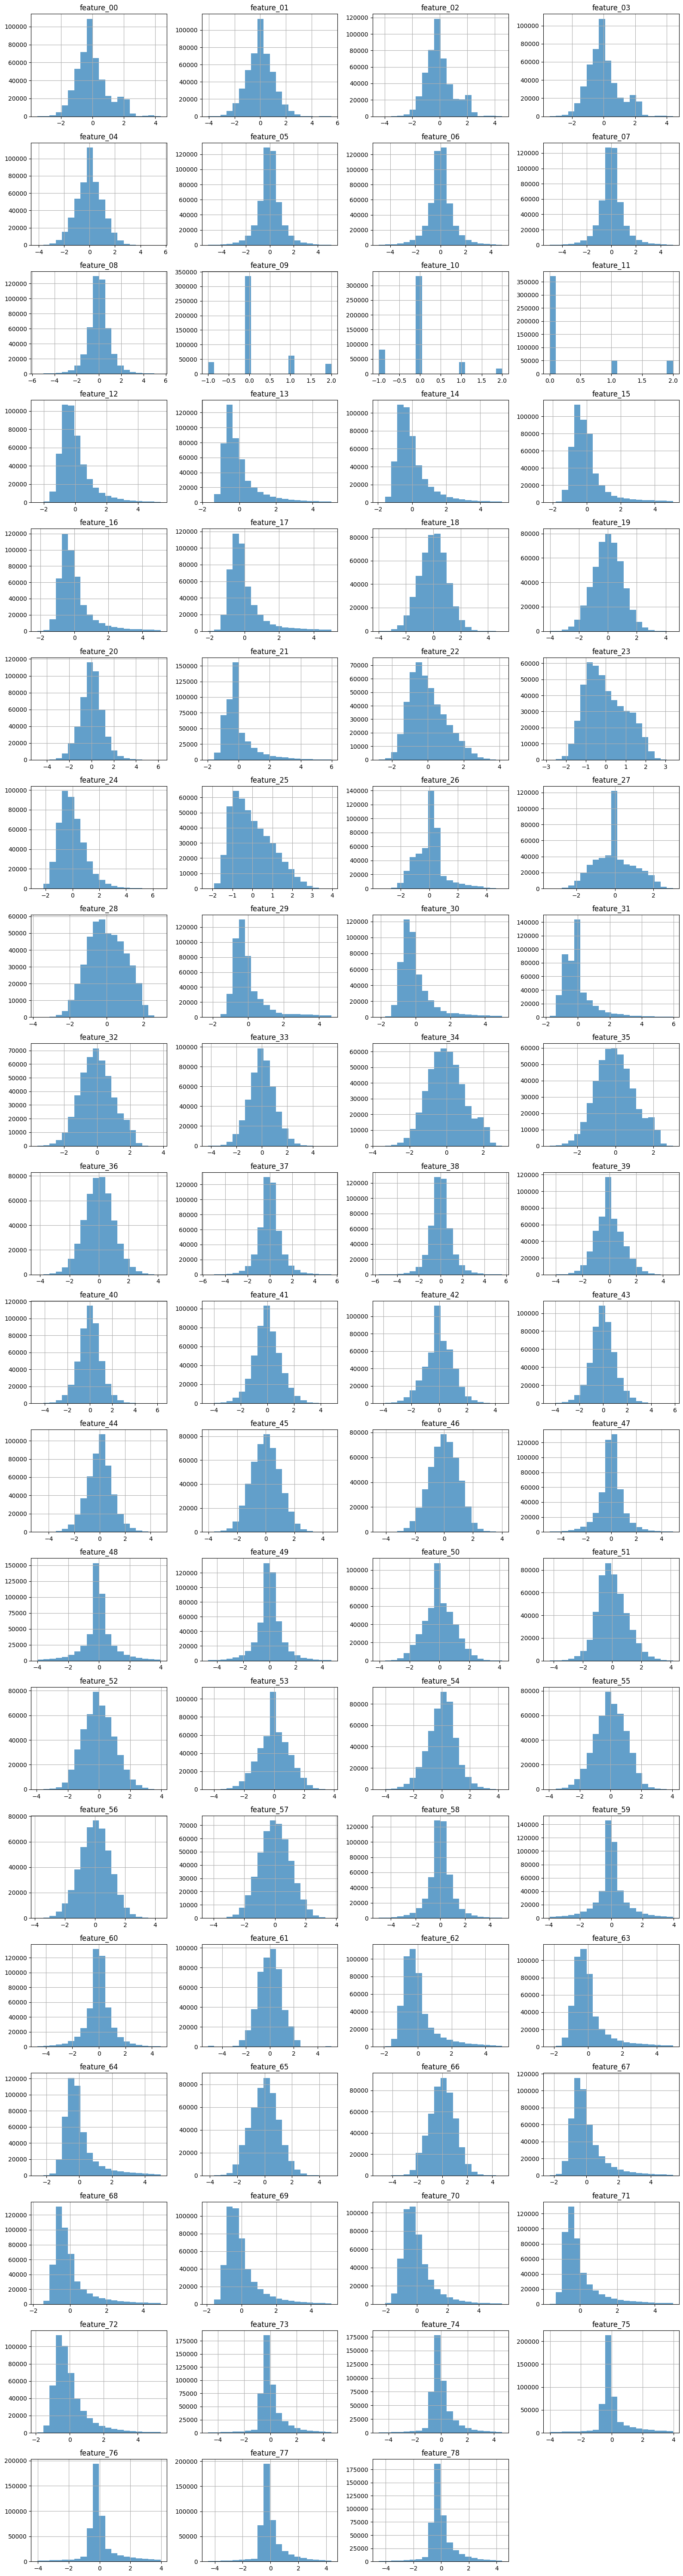

In [31]:
# scaling only

feature_labels = features_df.columns  # List of all column names

# Calculate the number of rows and columns for the subplot grid
n_cols = 4  # For example, 4 columns
n_rows = (len(feature_labels) + n_cols - 1) // n_cols  # This ensures there are enough rows

plt.figure(figsize=(n_cols * 4, n_rows * 3))  # Adjust overall figure size

# Create a histogram for each feature
for i, feature_label in enumerate(feature_labels):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each feature
    df_miss_outliers_replaced_scaled[feature_label].hist(bins=20, alpha=0.7)  # You can adjust the number of bins
    plt.title(feature_label)
    plt.tight_layout()

plt.show()

After scaling, we can observe a better distribution of those extremely unbalanced features.

However, some of them are still unbalanced and we assume this will be useful in the future so we will keep this pattern
